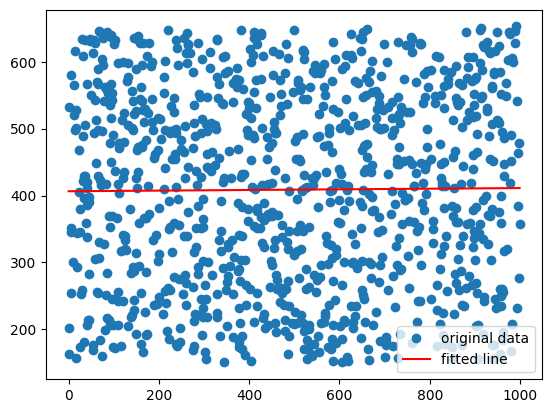

In [2]:
import random
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

def value(alpha = 0.95):
    x = 1000 * random.random()
    y = 0.5 * x + random.gauss(0, 3) + 150
    if random.random() < alpha:
        y = random.uniform(150, 650)
    return x, y

values = [value() for _ in range(1000)]
values.sort()

x = np.array([v[0] for v in values])
y = np.array([v[1] for v in values])
res = stats.linregress(x, y) 
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()


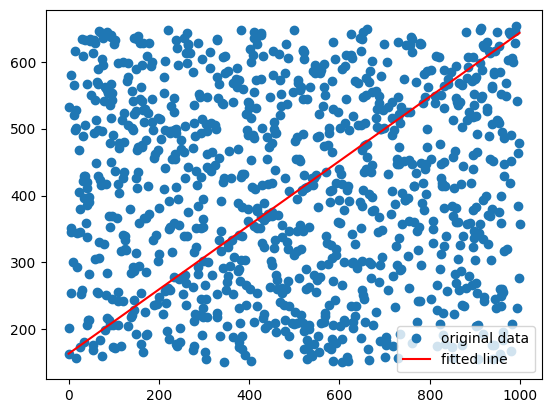

In [18]:
import numpy as np

threshold = 20

def ransac(values):
    best_diff = None
    best_score = 0
    for k in range(100):
        sample = random.sample(values, 2)
        # TODO: perform linear regression based on the current sample
        x = np.array([v[0] for v in sample])
        y = np.array([v[1] for v in sample])
        lin = stats.linregress(x, y) 

        m, c = lin.slope, lin.intercept
        
        # TODO: add datapoints to alsoInliers
        alsoInliers = []
        for (x0, y0) in values:
            # Calculate perpendicular distance to the line y = mx + c
            distance = abs(m * x0 - y0 + c) / np.sqrt(m**2 + 1)
            if distance < threshold:
                alsoInliers.append((x0, y0))
        # TODO: calc how many points are in maybeInliers and alsoInliers
        score = len(alsoInliers)
        # TODO: update the best model if needed
        if score > best_score:
            best_diff = lin
            best_score = score
    return best_diff
lin = ransac(values)

# TODO: plot the results
plt.plot(x, y, 'o', label='original data')
plt.plot(x, lin.intercept + lin.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()